# Solving Linear Systems: 2 variables #

In [18]:
import numpy as np

### 1.1 - System of Linear Equations

$$\begin{cases} 
-x_1+3x_2=7, \\ 3x_1+2x_2=1, \end{cases}\tag{1}$$

In [19]:
A = np.array([
    [-1, 3],
    [3,2]
    ], dtype = np.dtype(float))

b = np.array([7,1], dtype = np.dtype(float))

print("Matrix A: ")
print(A)
print("\nMatrix b: ")
print(b)

Matrix A: 
[[-1.  3.]
 [ 3.  2.]]

Matrix b: 
[7. 1.]


In [20]:
print(f"Shape of A: {A.shape}")
print(f"Shape of b: {b.shape}")

Shape of A: (2, 2)
Shape of b: (2,)


In [21]:
x = np.linalg.solve(A, b)
print(f"Solution: {x}")

Solution: [-1.  2.]


### Evaluating determinant of a Matrix

In [22]:
d = np.linalg.det(A)
print(f"Determinant of matrix A: {d: .2f}")

Determinant of matrix A: -11.00


In [23]:
A_system = np.hstack((A, b.reshape((2,1))))
print(A_system)

[[-1.  3.  7.]
 [ 3.  2.  1.]]


In [24]:
print(A_system[1])

[3. 2. 1.]


In [25]:
A_system_res = A_system.copy()

In [26]:
A_system_res[1] = 3 * A_system_res[0] + A_system_res[1]
print(A_system_res)

[[-1.  3.  7.]
 [ 0. 11. 22.]]


In [27]:
A_system_res[1] = 1/11 * A_system_res[1]
print(A_system_res)

[[-1.  3.  7.]
 [ 0.  1.  2.]]


In [28]:
import matplotlib.pyplot as plt

def plot_lines(M):
    x_1 = np.linspace(-10,10,100)
    x_2_line_1 = (M[0,2] - M[0,0] * x_1) / M[0,1]
    x_2_line_2 = (M[1,2] - M[1,0] * x_1) / M[1,1]
    
    _, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x_1, x_2_line_1, '-', linewidth=2, color='#0075ff',
        label=f'$x_2={-M[0,0]/M[0,1]:.2f}x_1 + {M[0,2]/M[0,1]:.2f}$')
    ax.plot(x_1, x_2_line_2, '-', linewidth=2, color='#ff7300',
        label=f'$x_2={-M[1,0]/M[1,1]:.2f}x_1 + {M[1,2]/M[1,1]:.2f}$')

    A = M[:, 0:-1]
    b = M[:, -1::].flatten()
    d = np.linalg.det(A)

    if d != 0:
        solution = np.linalg.solve(A,b) 
        ax.plot(solution[0], solution[1], '-o', mfc='none', 
            markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
        ax.text(solution[0]-0.25, solution[1]+0.75, f'$(${solution[0]:.0f}$,{solution[1]:.0f})$', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))

    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([-10, 10, -10, 10])

    plt.grid()
    plt.gca().set_aspect("equal")

    plt.show()

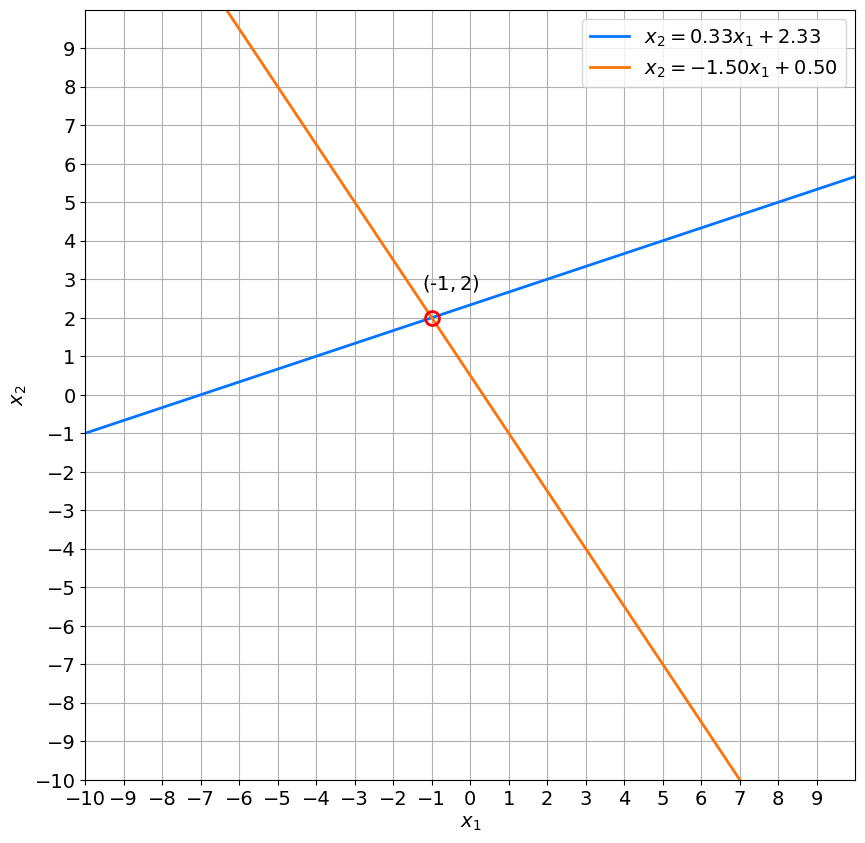

In [29]:
plot_lines(A_system)

## 3 - System of Linear Equations with No Solutions

Given another system of linear equations:

$$\begin{cases} 
-x_1+3x_2=7, \\ 3x_1-9x_2=1, \end{cases}\tag{5}$$

let's find the determinant of the corresponding matrix

In [31]:
A_2 = np.array([
    [-1,3],
    [3,-9]
], dtype=np.dtype(float))

b_2= np.array([7,1], dtype= np.dtype(float))
d_2 = np.linalg.det(A_2)
print(f"Determinant of matrix A_2 : {d_2: .2f}")

Determinant of matrix A_2 :  0.00


In [32]:
try:
    x_2 = np.linalg.solve(A_2, b_2)
except np.linalg.LinAlgError as err:
    print(err)

Singular matrix


In [33]:
A_2_system = np.hstack((A_2, b_2.reshape((2,1))))
print(A_2_system)

[[-1.  3.  7.]
 [ 3. -9.  1.]]


In [34]:
A_2_system_res = A_2_system.copy()

A_2_system_res[1] = 3* A_2_system_res[0] + A_2_system_res[1]
print(A_2_system_res)

[[-1.  3.  7.]
 [ 0.  0. 22.]]


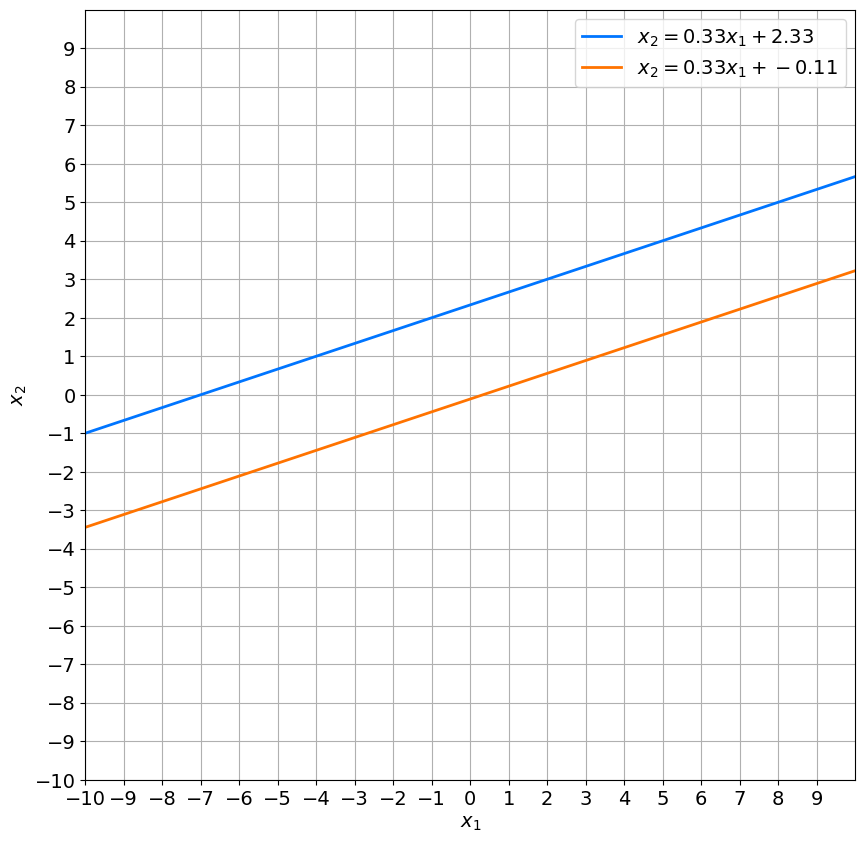

In [35]:
plot_lines(A_2_system)

## 4 - System of Linear Equations with Infinite Number of Solutions

Changing free coefficients of the system $(5)$ you can bring it to consistency:

$$\begin{cases} 
-x_1+3x_2=7, \\ 3x_1-9x_2=-21, \end{cases}\tag{6}$$

In [36]:
b_3 = np.array([7, -21], dtype=np.dtype(float))

In [37]:
A_3_system = np.hstack((A_2, b_3.reshape((2,1))))
print(A_3_system)

[[ -1.   3.   7.]
 [  3.  -9. -21.]]


In [38]:
A_3_system_res= A_3_system.copy()
A_3_system_res[1] = 3 * A_3_system_res[0] + A_3_system_res[1]

print(A_3_system_res)

[[-1.  3.  7.]
 [ 0.  0.  0.]]


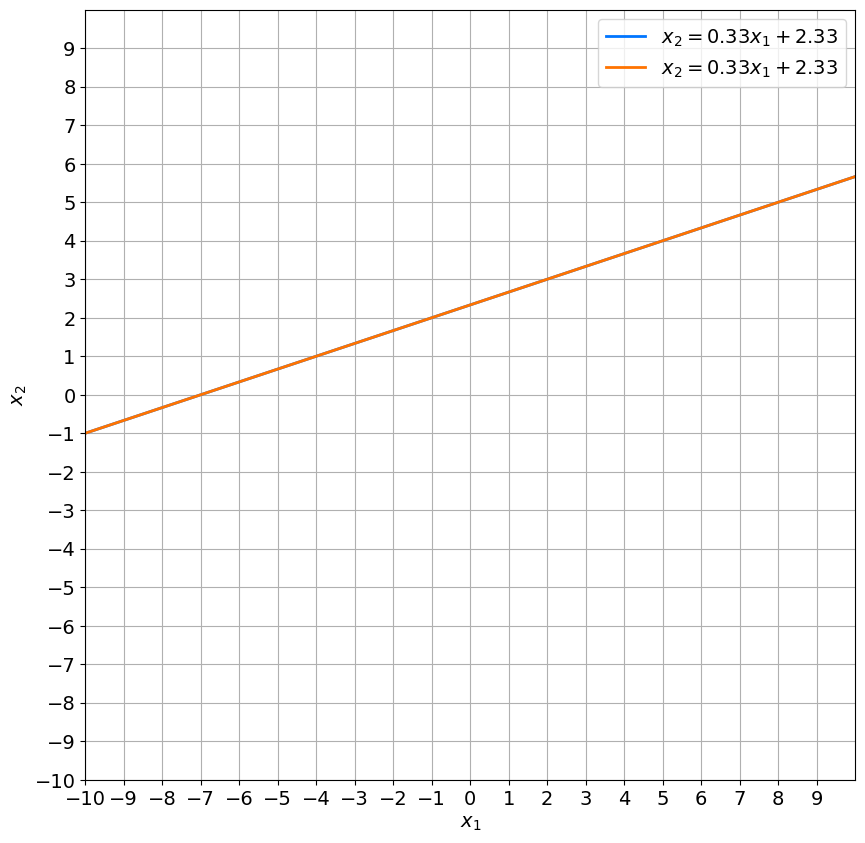

In [39]:
plot_lines(A_3_system)